In [1]:
#Python version
!python --version

Python 3.8.5


In [2]:
#Install uninstalled modules, comment if it's already installed

#!pip install ipykernel
#!pip install MetaTrader5==5.0.34
#!pip install gym
#!pip install gym-anytrading
#!pip install torch==1.8.1+cu102 torchvision==0.9.1+cu102 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [3]:
#Import needed modules
import gym
import gym_anytrading
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

import random, datetime, os, copy
import MetaTrader5 as mt5

In [4]:
# display data on the MetaTrader 5 package
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    mt5.shutdown()
 
# display data on MetaTrader 5 version
print(mt5.version())

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

"""
# Initialize Metatrader on a certain day
if datetime.datetime.now() == weekdays:
    # now connect to another trading account specifying the password
    account = #Account number
    password = #Password number
    server = #Server name
    authorized=mt5.login(account, password, server)
    if authorized:
        # display trading account data 'as is'
        print(mt5.account_info())
        # display trading account data in the form of a list
        print("Show account_info()._asdict():")
        account_info_dict = mt5.account_info()._asdict()
        for prop in account_info_dict:
            print("  {}={}".format(prop, account_info_dict[prop]))
    else:
        print("failed to connect at account #{}, error code: {}".format(account, mt5.last_error()))
# shut down connection to the MetaTrader 5 terminal
else:
    mt5.shutdown()
"""

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.34
initialize() failed, error code = (-10003, 'IPC initialize failed, MetaTrader 5 x64 not found')
(0, 0, '')


'\n# Initialize Metatrader on a certain day\nif datetime.datetime.now() == weekdays:\n    # now connect to another trading account specifying the password\n    account = #Account number\n    password = #Password number\n    server = #Server name\n    authorized=mt5.login(account, password, server)\n    if authorized:\n        # display trading account data \'as is\'\n        print(mt5.account_info())\n        # display trading account data in the form of a list\n        print("Show account_info()._asdict():")\n        account_info_dict = mt5.account_info()._asdict()\n        for prop in account_info_dict:\n            print("  {}={}".format(prop, account_info_dict[prop]))\n    else:\n        print("failed to connect at account #{}, error code: {}".format(account, mt5.last_error()))\n# shut down connection to the MetaTrader 5 terminal\nelse:\n    mt5.shutdown()\n'


env information:
> shape: (10, 2)
> df.shape: (6225, 5)
> prices.shape: (1500,)
> signal_features.shape: (1500, 2)
> max_possible_profit: 1.5375451883597002


> possible action: Discrete(2)
> observation space: Box(-inf, inf, (10, 2), float32)


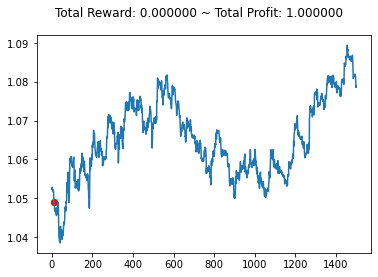

In [32]:
env = gym.make('forex-v0',
               df = FOREX_EURUSD_1H_ASK,
               window_size = 10,
               frame_bound = (10, 1500), #Max 6225 Rows of data
               unit_side = 'right')

print()
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())
print("\n")
print("> possible action:", env.action_space)
print("> observation space:", env.observation_space)

env.reset() # Uncomment if you need it.
env.render()

In [31]:
print(env.df)

                        Open     High      Low    Close        Volume
Time                                                                 
2017-01-01 22:00:00  1.05236  1.05253  1.05221  1.05227  1.435400e+08
2017-01-01 23:00:00  1.05227  1.05426  1.05226  1.05282  2.531400e+08
2017-02-01 00:00:00  1.05283  1.05283  1.05268  1.05281  1.314000e+08
2017-02-01 01:00:00  1.05282  1.05286  1.05225  1.05240  2.739400e+08
2017-02-01 02:00:00  1.05239  1.05240  1.05164  1.05220  2.581400e+08
...                      ...      ...      ...      ...           ...
2017-12-29 17:00:00  1.20224  1.20257  1.20191  1.20218  9.283300e+09
2017-12-29 18:00:00  1.20218  1.20242  1.20122  1.20139  7.366750e+09
2017-12-29 19:00:00  1.20139  1.20144  1.20073  1.20096  7.205770e+09
2017-12-29 20:00:00  1.20098  1.20109  1.19978  1.19982  6.679810e+09
2017-12-29 21:00:00  1.19984  1.20130  1.19931  1.20075  4.885530e+09

[6225 rows x 5 columns]


info: {'total_reward': 79.70000000006684, 'total_profit': 0.9122477314924045, 'position': 1}


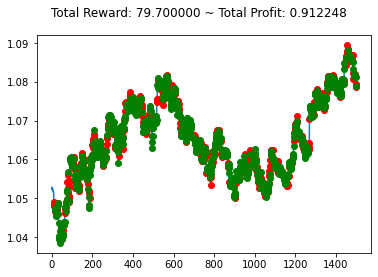

In [18]:
# Based on random actions

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()